In [1]:
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
sl=pd.read_csv("SalaryData_Train(1).csv")

In [3]:
sl.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#EDA

In [5]:
sl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
sl.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
sl.shape

(30161, 14)

In [8]:
sl.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [9]:
sl["Salary"].unique()

array([' <=50K', ' >50K'], dtype=object)

# Label encoding

In [10]:
le=preprocessing.LabelEncoder()
for i in range(0,sl.shape[1]):
    if sl.dtypes[i]=='object':
        sl[sl.columns[i]]=le.fit_transform(sl[sl.columns[i]])

In [11]:
sl.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


# scatter plot

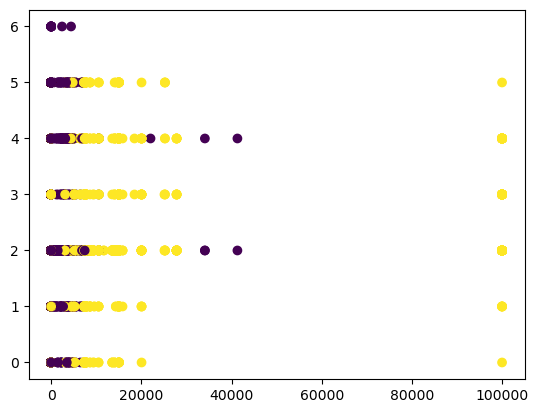

In [12]:
plt.scatter(sl["capitalgain"],sl["workclass"],c=sl["Salary"])

In [13]:
sl["Salary"].value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

# Splitting data into x and y

In [14]:
x=sl.iloc[:,:-1]
y=sl.iloc[:,-1]

In [15]:
x.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4


In [16]:
y

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

# Splitting data into test  and train data

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=15)

In [18]:
model1=SVC(kernel='rbf',gamma=0.0001,C=20)

In [21]:
model1.fit(x_train,y_train)

SVC(C=20, gamma=0.0001)

In [22]:
preds=model1.predict(x_test)

In [23]:
accuracy_score(y_test,preds)

0.8420735382760699

In [24]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      7520
           1       0.86      0.42      0.57      2434

    accuracy                           0.84      9954
   macro avg       0.85      0.70      0.74      9954
weighted avg       0.84      0.84      0.82      9954

